In [0]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64,3)))    #1st Conv
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))    #pooling

model.add(Conv2D(32, (3, 3)))    #2nd conv
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))    #pooling

model.add(Conv2D(64, (3, 3)))     
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))    #pooling

model.add(Flatten())    #flatten

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))    #model was overfitting so add dropout

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)

#had to mount my google drive to colab
training_set = train_gen.flow_from_directory('gdrive/My Drive/Colab Notebooks/CNN_Data/training_set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = test_gen.flow_from_directory('gdrive/My Drive/Colab Notebooks/CNN_Data/test_set', target_size = (64,64),
                                           batch_size = 32,
                                           class_mode = 'binary')


Found 2814 images belonging to 2 classes.
Found 1106 images belonging to 2 classes.


In [16]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])
                   
model.fit_generator(training_set,
                        steps_per_epoch = len(training_set),
                        epochs = 25,
                        validation_data= test_set,
                        validation_steps = len(test_set))

Epoch 1/25
88/88 [==============================] - 35s 396ms/step - loss: 0.4435 - acc: 0.7845 - val_loss: 0.5535 - val_acc: 0.7378
Epoch 2/25
88/88 [==============================] - 33s 370ms/step - loss: 0.4140 - acc: 0.8131 - val_loss: 0.5206 - val_acc: 0.7532
Epoch 3/25
88/88 [==============================] - 32s 369ms/step - loss: 0.4386 - acc: 0.8137 - val_loss: 0.6020 - val_acc: 0.7468
Epoch 4/25
88/88 [==============================] - 32s 369ms/step - loss: 0.4102 - acc: 0.8127 - val_loss: 0.4687 - val_acc: 0.7821
Epoch 5/25
88/88 [==============================] - 33s 370ms/step - loss: 0.4011 - acc: 0.8205 - val_loss: 0.5178 - val_acc: 0.7839
Epoch 6/25
88/88 [==============================] - 33s 378ms/step - loss: 0.4196 - acc: 0.8063 - val_loss: 0.4923 - val_acc: 0.7776
Epoch 7/25
88/88 [==============================] - 32s 368ms/step - loss: 0.4031 - acc: 0.8138 - val_loss: 0.5491 - val_acc: 0.7803
Epoch 8/25
88/88 [==============================] - 32s 368ms/step - 

Cat


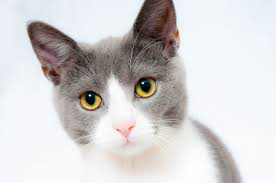

In [23]:
from keras.preprocessing import image
model.save('cat_dog.h5')
sample_image_path= 'gdrive/My Drive/Colab Notebooks/cat.jpg'   #test on a sample image downloaded from google images
im = image.load_img(sample_image_path, target_size = (64, 64))
im = image.img_to_array(im)

im = np.expand_dims(im, axis = 0)
pred = model.predict(im)
result = ""
if pred[0][0]==1.0:
    result = "Dog"
else:
    result = "Cat"

print(result)

display= Image.open(sample_image_path)
display

